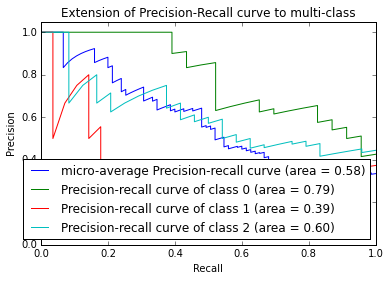

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm, datasets
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=random_state)

# Run classifier
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute Precision-Recall and plot curve
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

# Compute micro-average ROC curve and ROC area
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(y_test, y_score,
                                                     average="micro")

# # Plot Precision-Recall curve
# plt.clf()
# plt.plot(recall[0], precision[0], label='Precision-Recall curve')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.ylim([0.0, 1.05])
# plt.xlim([0.0, 1.0])
# plt.title('Precision-Recall example: AUC={0:0.2f}'.format(average_precision[0]))
# plt.legend(loc="lower left")
# plt.show()

# Plot Precision-Recall curve for each class
plt.clf()
plt.plot(recall["micro"], precision["micro"],
         label='micro-average Precision-recall curve (area = {0:0.2f})'
               ''.format(average_precision["micro"]))
for i in range(n_classes):
    plt.plot(recall[i], precision[i],
             label='Precision-recall curve of class {0} (area = {1:0.2f})'
                   ''.format(i, average_precision[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(loc="lower right")
plt.show()

In [3]:
y_score

array([[  4.65045111e-02,  -6.31216793e-01,  -4.22057752e-01],
       [ -2.95095932e-03,  -5.61070052e-01,  -4.32256433e-01],
       [ -3.36978174e-01,  -6.27779347e-01,  -3.32769381e-02],
       [ -1.53987313e-01,  -9.16943886e-01,   8.12796490e-02],
       [ -7.53107658e-03,  -6.25858732e-01,  -3.74356599e-01],
       [  3.77761948e-01,  -6.95331339e-01,  -6.79025293e-01],
       [ -2.02346133e-01,  -2.95066804e-01,  -5.01032537e-01],
       [  2.19456348e-01,  -4.20622536e-01,  -7.99486851e-01],
       [ -5.32691884e-01,   5.08758696e-02,  -5.15764820e-01],
       [ -6.35582990e-01,  -7.59675558e-01,   3.95088419e-01],
       [ -3.50868860e-02,  -8.53150590e-01,  -1.08862034e-01],
       [ -2.47719825e-01,  -1.12112103e+00,   3.62018925e-01],
       [ -5.31947084e-01,  -3.04807003e-01,  -1.57555699e-01],
       [ -5.29102470e-01,  -5.74713024e-01,   1.04168746e-01],
       [ -2.24146401e-01,  -4.44399556e-01,  -3.28593856e-01],
       [  4.89233111e-01,  -9.25428912e-01,  -5.5867039

In [6]:
y_true = np.array([1, 1, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
print precision, recall, thresholds

[ 1.  1.  1.  1.  1.] [ 1.    0.75  0.5   0.25  0.  ] [ 0.1   0.35  0.4   0.8 ]


In [9]:
from sklearn.metrics import precision_recall_fscore_support

y_true = np.array(['cat', 'dog', 'pig', 'cat', 'dog', 'pig'])
y_pred = np.array(['cat', 'pig', 'dog', 'cat', 'cat', 'dog'])
a,b,c,d = precision_recall_fscore_support(y_true, y_pred, average='macro')

In [10]:
print a,b,c,d

0.222222222222 0.333333333333 0.266666666667 None
